In [12]:
# the bare minimum
import matplotlib.pyplot as plt  # for plotting
import geopandas as gpd  # for geospatial data handling
from matplotlib.lines import Line2D

# more advanced
from lonboard._map import Map
from lonboard._layer import PolygonLayer  # for mapping in 3D
from lonboard.colormap import (
    apply_categorical_cmap,
    apply_continuous_cmap,
)  # for assigning colors
from palettable.colorbrewer.sequential import PuRd_9  # for color palettes
from matplotlib.colors import LogNorm  # for logarithmic normalization
import pygwalker as pyg  # for creating interactive data visualizations

In [13]:
pluto = gpd.read_file(
    "/Users/sara1/Desktop/MSCDP/Mapping System/cdp-mapping-systems/Data/NewYorkCity_StreetTreeCensus_2005_20250710.geojson"
)

In [14]:
pluto.columns

Index(['nta', 'horz_grate', 'sidw_crack', 'zipcode', 'soil_lvl', 'inf_outlet',
       'latitude', 'nta_name', 'state', 'inf_canopy', 'y_sp', 'wire_2_nd',
       'inf_guard', 'spc_common', 'horz_other', 'x_sp', 'inf_other',
       'tree_loc', 'wire_other', 'wire_prime', 'longitude', 'boro_ct',
       'zip_city', 'sidw_raise', 'spc_latin', 'vert_other', 'cen_year',
       'boroname', 'st_senate', 'wire_htap', 'status', 'vert_tgrd', 'cncldist',
       'inf_lights', 'vert_wall', 'st_assem', 'cb_num', 'pit_type',
       'trunk_dmg', 'address', 'horz_plant', 'inf_wires', 'borocode',
       'horz_blck', 'vert_pgrd', 'tree_dbh', 'inf_paving', 'inf_shoes',
       'geometry'],
      dtype='object')

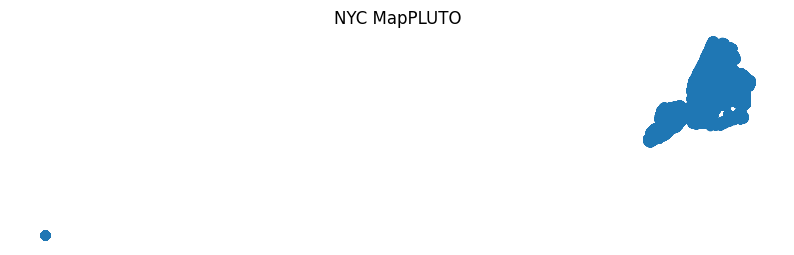

In [15]:
# In this example, we are using matplotlib to map our pluto data.
# Under the hood, matplotlib is drawing each individual polygon (>800,000),
# which is resource intensive and hard to discern on a map! This is a good
# place to start, but we'll soon move on to more advanced mapping techniques.

pluto.plot(figsize=(10, 10)).set_axis_off()
plt.title("NYC MapPLUTO")
plt.show()

In [16]:
pluto.zip_city.value_counts()

zip_city
Brooklyn               141957
Staten Island           98823
Bronx                   58780
New York                49409
Flushing                22390
Jamaica                 21825
Fresh Meadows           10769
Ridgewood               10347
Whitestone              10346
Queens Village           9743
Bayside                  9538
Astoria                  7764
Forest Hills             7714
Little Neck              6991
Oakland Gardens          6864
South Ozone Park         6253
East Elmhurst            6039
Rosedale                 6002
Ozone Park               5827
Springfield Gardens      5734
Woodside                 5666
Middle Village           5151
Bellerose                4910
Glen Oaks                4699
Elmhurst                 4699
Howard Beach             4418
Far Rockaway             4336
Maspeth                  3934
Jackson Heights          3523
Rockaway Park            3510
Corona                   3366
Saint Albans             3322
Woodhaven                3202
C

In [17]:
pluto.zipcode.value_counts()

zipcode
10312    22958
10314    15273
10309    11936
10306    11393
11234    10533
         ...  
11559       14
11251       14
10550       13
11359        7
10704        7
Name: count, Length: 188, dtype: int64

In [22]:
import geopandas as gpd

gdf = gpd.read_file(
    "/Users/sara1/Desktop/MSCDP/Mapping System/cdp-mapping-systems/Data/NewYorkCity_StreetTreeCensus_2005_20250710.geojson"
)

In [ ]:
# Try Printing a Small Preview to Comfirm it is loading correctly
print(gdf.head())
print(gdf.columns)

    nta horz_grate sidw_crack zipcode soil_lvl inf_outlet       latitude  \
0  BK88         No         No   11219    Level         No  40.6326532076   
1  BK45         No         No   11234    Level         No  40.6200837468   
2  BK45         No         No   11234    Level         No  40.6179956717   
3  BK45         No         No   11234    Level         No  40.6196935996   
4  BK45         No         No   11234    Level         No  40.6183226144   

                                         nta_name     state inf_canopy  ...  \
0                                    Borough Park  New York         No  ...   
1  Georgetown-Marine Park-Bergen Beach-Mill Basin  New York         No  ...   
2  Georgetown-Marine Park-Bergen Beach-Mill Basin  New York         No  ...   
3  Georgetown-Marine Park-Bergen Beach-Mill Basin  New York         No  ...   
4  Georgetown-Marine Park-Bergen Beach-Mill Basin  New York         No  ...   

              address horz_plant inf_wires borocode horz_blck vert_p

In [24]:
# Confirm the Column Name
print(gdf.columns)

Index(['nta', 'horz_grate', 'sidw_crack', 'zipcode', 'soil_lvl', 'inf_outlet',
       'latitude', 'nta_name', 'state', 'inf_canopy', 'y_sp', 'wire_2_nd',
       'inf_guard', 'spc_common', 'horz_other', 'x_sp', 'inf_other',
       'tree_loc', 'wire_other', 'wire_prime', 'longitude', 'boro_ct',
       'zip_city', 'sidw_raise', 'spc_latin', 'vert_other', 'cen_year',
       'boroname', 'st_senate', 'wire_htap', 'status', 'vert_tgrd', 'cncldist',
       'inf_lights', 'vert_wall', 'st_assem', 'cb_num', 'pit_type',
       'trunk_dmg', 'address', 'horz_plant', 'inf_wires', 'borocode',
       'horz_blck', 'vert_pgrd', 'tree_dbh', 'inf_paving', 'inf_shoes',
       'geometry'],
      dtype='object')


In [25]:
# Check the type of zipcode
print(gdf["zipcode"].dtype)

object


In [27]:
# Clean and convert ZIP code from object to integers
gdf["zipcode"] = gdf["zipcode"].astype(int)

In [28]:
# Filter for Manhattan ZIP code range
manhattan_gdf = gdf[(gdf["zipcode"] >= 10001) & (gdf["zipcode"] <= 10282)]

In [29]:
# Preview the result
print(manhattan_gdf.shape)  # Number of features
print(manhattan_gdf.head())  # Preview

(49409, 49)
     nta horz_grate sidw_crack  zipcode soil_lvl inf_outlet       latitude  \
17  MN22         No         No    10003    Above         No  40.7289936566   
18  MN22         No         No    10003    Level         No  40.7291720476   
19  MN22         No         No    10003    Level         No  40.7296495864   
20  MN25         No         No    10006    Above         No  40.7083534461   
21  MN25         No         No    10006    Above         No  40.7083534461   

                             nta_name     state inf_canopy  ...  \
17                       East Village  New York         No  ...   
18                       East Village  New York         No  ...   
19                       East Village  New York         No  ...   
20  Battery Park City-Lower Manhattan  New York         No  ...   
21  Battery Park City-Lower Manhattan  New York         No  ...   

              address horz_plant inf_wires borocode horz_blck vert_pgrd  \
17       167 1 AVENUE         No        N

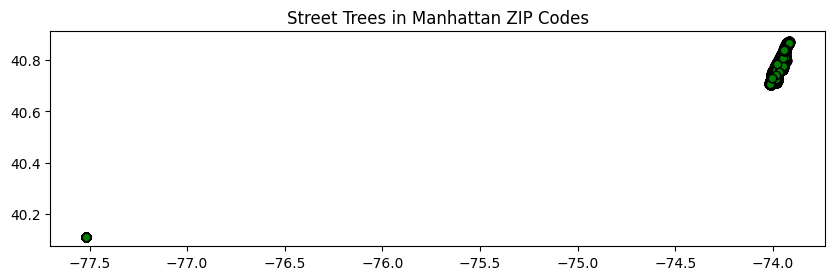

In [31]:
# Visualize the Map
import matplotlib.pyplot as plt

# Basic plot
manhattan_gdf.plot(figsize=(10, 10), color="green", edgecolor="black")

# Optional: Add title
plt.title("Street Trees in Manhattan ZIP Codes")
plt.axis("on")
plt.show()

In [32]:
# Filtering Street Tree Data near Columbia University
columbia_zips = [10025, 10026, 10027, 10030, 10031]
near_columbia_gdf = gdf[gdf["zipcode"].isin(columbia_zips)]

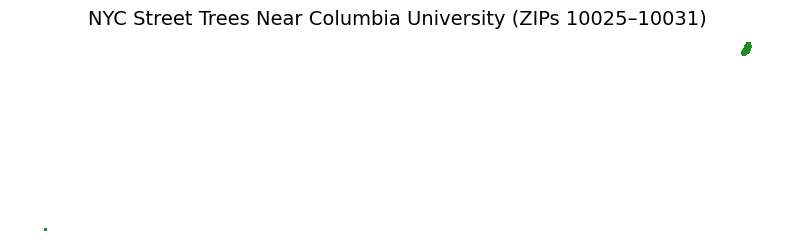

In [33]:
# 4. Plot
fig, ax = plt.subplots(figsize=(10, 10))
near_columbia_gdf.plot(ax=ax, color="forestgreen", markersize=1, alpha=0.7)

# Optional: Add map title and styling
ax.set_title(
    "NYC Street Trees Near Columbia University (ZIPs 10025–10031)", fontsize=14
)
ax.set_axis_off()
plt.show()

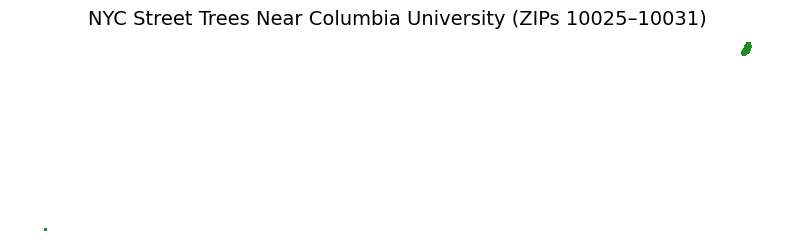

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Load the dataset
gdf = gpd.read_file(
    "/Users/sara1/Desktop/MSCDP/Mapping System/cdp-mapping-systems/Data/NewYorkCity_StreetTreeCensus_2005_20250710.geojson"
)

# 2. Clean and convert ZIP code column
gdf["zipcode"] = gdf["zipcode"].astype(str).str.strip()
gdf = gdf[gdf["zipcode"].str.match(r"^\d{5}$", na=False)]
gdf["zipcode"] = gdf["zipcode"].astype(int)

# 3. Filter ZIP codes near Columbia University
columbia_zips = [10025, 10026, 10027, 10030, 10031]
near_columbia_gdf = gdf[gdf["zipcode"].isin(columbia_zips)]

# 4. Plot
fig, ax = plt.subplots(figsize=(10, 10))
near_columbia_gdf.plot(ax=ax, color="forestgreen", markersize=1, alpha=0.7)

# Optional: Add map title and styling
ax.set_title(
    "NYC Street Trees Near Columbia University (ZIPs 10025–10031)", fontsize=14
)
ax.set_axis_off()
plt.show()

In [ ]:
# The Previous on looks very weird beacuse some data seems to be really far from the city
# Check if there are invalid or null geometries
print(near_columbia_gdf.is_empty.sum(), "empty geometries")
print(near_columbia_gdf.geometry.isna().sum(), "NaN geometries")

0 empty geometries
0 NaN geometries


In [ ]:
from shapely.geometry import box

# Define bounding box roughly around Columbia by importing box from shapely because geopanda have no this function
minx, miny = -73.97, 40.79  # lower-left
maxx, maxy = -73.94, 40.82  # upper-right

bbox = gpd.GeoDataFrame(geometry=[box(minx, miny, maxx, maxy)], crs="EPSG:4326")

# Clip your data
near_columbia_clipped = gpd.overlay(near_columbia_gdf, bbox, how="intersection")

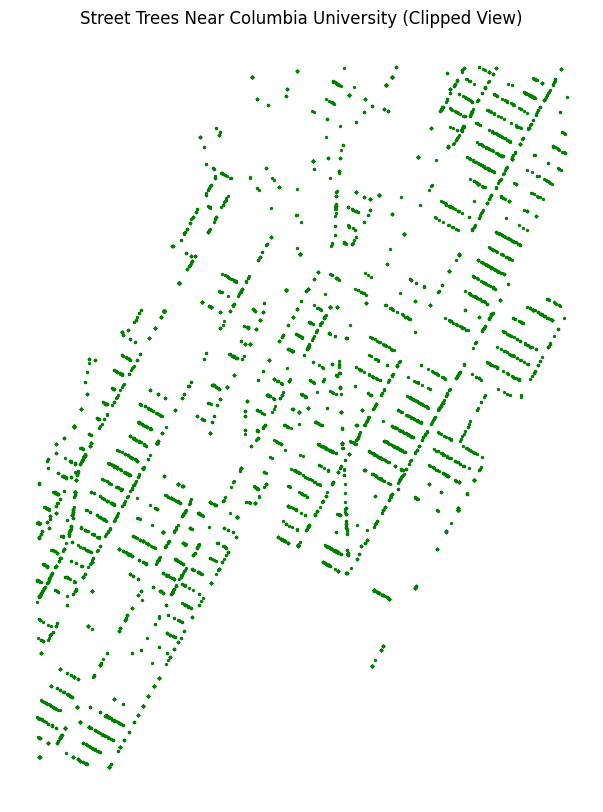

In [ ]:
# The Visualizing the map
fig, ax = plt.subplots(figsize=(10, 10))
near_columbia_clipped.plot(ax=ax, color="green", markersize=2)
ax.set_title("Street Trees Near Columbia University (Clipped View)")
ax.set_axis_off()
plt.show()

In [39]:
near_columbia_gdf.to_file("near_columbia_trees.geojson", driver="GeoJSON")

In [40]:
near_columbia_gdf.to_file(
    "/Users/sara1/Desktop/MSCDP/Mapping System/cdp-mapping-systems/Data/near_columbia_trees.geojson",
    driver="GeoJSON",
)